<h1>Housing Market Analysis during the Covid-19 with Redfin Data</h1>

Housing is always a hot topic and owning a home is a very expensive dream in the Bay Area where I live. I am very interested in the housing market during the pandemic escpecially for the metro areas and I am going to explore the Redfin data using the part of data that already summarized for metro areas and answer some questions.

The Redfin data is open to public. The housing market data is very large and the data has been processed and aggregated. Some columns have no metrics and calculation explainations, some columns have a large percentage of missing values. These issue will be addressed in the project and you can download the data from Redfin [data center](https://www.redfin.com/news/data-center/). 

This project will follow the CRISP-DM Process, but will skip the data modelling step. The CRISP(Cross Industry Process for Data Mining) is a common process used to find solutions in the data science process in different industries. It has been an industry standard for analyzing data for years. It includes the following 6 steps:

1.business understanding <br>
2.data understanding <br>
3.prepare data <br>
4.data modelling <br>
5.evaluate the results <br>
6.deploy <br>

<h2>Importing the libraries and Loading the data</h2>

In [1]:
# import the libraries, read in the full data set and check the first 5 rows
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
%matplotlib inline
df=pd.read_csv('redfin_data.csv')
df.head()

,region_id,region_type_id,region_name,region_type,period_begin,period_end,duration,total_homes_sold,total_homes_sold_yoy,average_homes_sold,...,average_adjustment_average_homes_sold,adjusted_average_homes_sold,average_adjustment_average_new_listings,adjusted_average_new_listings,average_adjustment_pending_sales,adjusted_pending_sales,adjusted_average_homes_delisted_yoy,adjusted_average_homes_sold_yoy,adjusted_average_new_listings_yoy,adjusted_pending_sales_yoy
0,1859,5,"Washington County, NE",county,3/1/2021,3/7/2021,1 weeks,3.0,0.000000,3.0,...,NaN,3.0,NaN,3.0,NaN,4.0,NaN,0.000000,-0.500000,0.000000
1,756,5,"Kane County, IL",county,1/1/2018,1/7/2018,1 weeks,59.0,-0.213333,59.0,...,NaN,59.0,NaN,82.0,NaN,52.0,-0.033333,-0.213333,-0.267857,-0.118644
2,1309,5,"York County, ME",county,7/31/2017,8/6/2017,1 weeks,85.0,0.133333,85.0,...,NaN,85.0,NaN,139.0,NaN,75.0,-0.500000,0.133333,0.287037,0.339286
3,3167,5,"Brown County, WI",county,2/25/2019,3/3/2019,1 weeks,80.0,-0.012346,80.0,...,NaN,80.0,NaN,62.0,NaN,36.0,-0.500000,-0.012346,-0.225000,-0.076923
4,756,5,"Kane County, IL",county,12/30/2019,1/5/2020,1 weeks,73.0,0.042857,73.0,...,NaN,73.0,NaN,68.0,NaN,40.0,0.021739,0.042857,-0.276596,-0.090909


In [2]:
# df.shape can check the number of rows and the number of columns in the dataset
print("There are {:,} rows and {} columns in this dataset".format(df.shape[0], df.shape[1]))

There are 1,048,575 rows and 98 columns in this dataset


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 98 columns):
region_id                                       1048575 non-null int64
region_type_id                                  1048575 non-null int64
region_name                                     1048575 non-null object
region_type                                     1048575 non-null object
period_begin                                    1048575 non-null object
period_end                                      1048575 non-null object
duration                                        1048575 non-null object
total_homes_sold                                898623 non-null float64
total_homes_sold_yoy                            836977 non-null float64
average_homes_sold                              898623 non-null float64
average_homes_sold_yoy                          836977 non-null float64
total_homes_sold_with_price_drops               898623 non-null float64
total_homes_sold_with_pri

In [4]:
df.duration.value_counts()

1 weeks     570251
4 weeks     409888
12 weeks     68436
Name: duration, dtype: int64

In [5]:
# The original data set is arranged by 1 week, 4 weeks and 12 weeks, which is the same data but stack on top of each other 
# and using different time range to aggrate the data. 1 week data has no overlap on the date, so, here I only select the portion of '1 weeks'
# And the region type has only metro or county, those two are overlap on data and I only want to analyze the metro areas
df_1w=df.query('duration=="1 weeks" and region_type=="metro"')
print(df_1w.shape)

(143092, 98)


In [6]:
# check missing value columns. Out of 98 columns, only 8 columns have no missing values
no_nulls=df_1w[df_1w.columns[df_1w.isnull().mean()==0]]
print("There are {} columns that have no missing values".format(no_nulls.shape[1]))
no_nulls.head()

There are 8 columns that have no missing values


,region_id,region_type_id,region_name,region_type,period_begin,period_end,duration,last_updated
19,31060,-2,"Los Alamos, NM metro area",metro,7/27/2020,8/2/2020,1 weeks,10/20/2021 15:18
25,19740,-2,"Denver, CO metro area",metro,11/20/2017,11/26/2017,1 weeks,10/20/2021 15:18
27,14180,-2,"Blytheville, AR metro area",metro,9/9/2019,9/15/2019,1 weeks,10/20/2021 15:18
31,11244,-2,"Anaheim, CA metro area",metro,8/19/2019,8/25/2019,1 weeks,10/20/2021 15:18
41,35420,-2,"New Philadelphia, OH metro area",metro,10/21/2019,10/27/2019,1 weeks,10/20/2021 15:18


In [7]:
df_cal = df_1w.select_dtypes(include = ["object"])
df_cal.head()

,region_name,region_type,period_begin,period_end,duration,last_updated
19,"Los Alamos, NM metro area",metro,7/27/2020,8/2/2020,1 weeks,10/20/2021 15:18
25,"Denver, CO metro area",metro,11/20/2017,11/26/2017,1 weeks,10/20/2021 15:18
27,"Blytheville, AR metro area",metro,9/9/2019,9/15/2019,1 weeks,10/20/2021 15:18
31,"Anaheim, CA metro area",metro,8/19/2019,8/25/2019,1 weeks,10/20/2021 15:18
41,"New Philadelphia, OH metro area",metro,10/21/2019,10/27/2019,1 weeks,10/20/2021 15:18


In [8]:
no_nulls.region_type.value_counts()

metro    143092
Name: region_type, dtype: int64

In [9]:
no_nulls.region_type_id.value_counts()

-2    143092
Name: region_type_id, dtype: int64

After checking the categorical columns and comparing the columns with the no missing value columns, we can see that all the categorical columns have no missing values. Columns region_type and region_type_id are the same but using different coding, we can remove the region_type_id column when needed. 

<h3>Deal with columns with 75% missing values and create useful new columns</h3>

In [10]:
# sort out the columns with 75% of missing values
missing_75pct=df_1w.columns[df_1w.isnull().mean()>0.75]
missing_75pct

Index(['average_of_median_list_price_amount',
       'average_of_median_list_price_amount_yoy',
       'average_of_median_offer_price_amount',
       'average_of_median_offer_price_amount_yoy', 'avg_offer_to_list',
       'avg_offer_to_list_yoy', 'average_adjustment_average_homes_delisted',
       'average_adjustment_average_homes_sold',
       'average_adjustment_average_new_listings',
       'average_adjustment_pending_sales'],
      dtype='object')

In [11]:
# if columns have 75% values are missing, the columns are not helpful in the analysis, so we drop those columns
df_1w.drop(missing_75pct, axis=1, inplace=True)
print('The shape of the df_1w data after dropped the columns with 75% of missing values is ', df_1w.shape)
df_1w.head()

The shape of the df_1w data after dropped the columns with 75% of missing values is  (143092, 88)


C:\Anaconda_7_24\lib\site-packages\pandas\core\frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


,region_id,region_type_id,region_name,region_type,period_begin,period_end,duration,total_homes_sold,total_homes_sold_yoy,average_homes_sold,...,price_drop_percent_of_old_list_price_yoy,last_updated,adjusted_average_homes_delisted,adjusted_average_homes_sold,adjusted_average_new_listings,adjusted_pending_sales,adjusted_average_homes_delisted_yoy,adjusted_average_homes_sold_yoy,adjusted_average_new_listings_yoy,adjusted_pending_sales_yoy
19,31060,-2,"Los Alamos, NM metro area",metro,7/27/2020,8/2/2020,1 weeks,10.0,-0.090909,10.0,...,-0.006329,10/20/2021 15:18,1.0,10.0,2.0,5.0,NaN,-0.090909,-0.600000,-0.375000
25,19740,-2,"Denver, CO metro area",metro,11/20/2017,11/26/2017,1 weeks,701.0,-0.022315,701.0,...,0.003247,10/20/2021 15:18,128.0,701.0,396.0,633.0,0.024000,-0.022315,-0.129670,-0.053812
27,14180,-2,"Blytheville, AR metro area",metro,9/9/2019,9/15/2019,1 weeks,3.0,NaN,3.0,...,NaN,10/20/2021 15:18,NaN,3.0,2.0,2.0,NaN,NaN,1.000000,NaN
31,11244,-2,"Anaheim, CA metro area",metro,8/19/2019,8/25/2019,1 weeks,646.0,0.059016,646.0,...,-0.001849,10/20/2021 15:18,146.0,646.0,636.0,457.0,0.006897,0.059016,-0.129959,0.072770
41,35420,-2,"New Philadelphia, OH metro area",metro,10/21/2019,10/27/2019,1 weeks,NaN,NaN,NaN,...,NaN,10/20/2021 15:18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
# After a manually check of the data set, I selected the columns that I am interested in as below
# which is specific to the data that is roll by 4 weeks and the region_type is metro
df_sub=df_1w[["region_name","region_type", "duration", "period_begin","period_end","inventory","inventory_yoy","total_homes_sold","total_homes_sold_yoy",
    "median_sale_price","median_sale_price_yoy","median_days_on_market", "median_days_to_close", "median_days_to_close_yoy",
     "off_market_in_two_weeks","off_market_in_one_week","last_updated"]]
print('The shape of df_sub is ', df_sub.shape)
df_sub.head()

The shape of df_sub is  (143092, 17)


,region_name,region_type,duration,period_begin,period_end,inventory,inventory_yoy,total_homes_sold,total_homes_sold_yoy,median_sale_price,median_sale_price_yoy,median_days_on_market,median_days_to_close,median_days_to_close_yoy,off_market_in_two_weeks,off_market_in_one_week,last_updated
19,"Los Alamos, NM metro area",metro,1 weeks,7/27/2020,8/2/2020,24.0,-0.111111,10.0,-0.090909,437000.0,0.365625,10.5,40.0,10.0,4.0,3.0,10/20/2021 15:18
25,"Denver, CO metro area",metro,1 weeks,11/20/2017,11/26/2017,5613.0,-0.130037,701.0,-0.022315,365000.0,0.054913,19.0,31.0,-5.0,364.0,270.0,10/20/2021 15:18
27,"Blytheville, AR metro area",metro,1 weeks,9/9/2019,9/15/2019,22.0,0.294118,3.0,NaN,118000.0,NaN,49.0,0.0,NaN,0.0,0.0,10/20/2021 15:18
31,"Anaheim, CA metro area",metro,1 weeks,8/19/2019,8/25/2019,9357.0,0.035639,646.0,0.059016,705000.0,-0.005642,55.0,8.0,-1.0,57.0,32.0,10/20/2021 15:18
41,"New Philadelphia, OH metro area",metro,1 weeks,10/21/2019,10/27/2019,3.0,0.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10/20/2021 15:18


In [13]:
# Here we have a list of columns that have various percentage of missing values. Some of the columns are already using 
# the median, and there is no explaination on the missing value, we will leave it as so far and deal with it when needed
df_sub.isnull().mean().sort_values()

region_name                 0.000000
period_end                  0.000000
period_begin                0.000000
last_updated                0.000000
region_type                 0.000000
duration                    0.000000
inventory                   0.001412
inventory_yoy               0.025809
total_homes_sold            0.132020
median_sale_price           0.132020
median_days_to_close        0.132020
median_days_on_market       0.136912
median_sale_price_yoy       0.174915
median_days_to_close_yoy    0.174915
total_homes_sold_yoy        0.174915
off_market_in_one_week      0.175922
off_market_in_two_weeks     0.175922
dtype: float64

In [14]:
# create column year based on the period_end column
df_sub['month']=df_sub['period_end'].apply(lambda x: x.split('/')[0])
df_sub['year']=df_sub['period_end'].apply(lambda x: x.split('/')[2])
df_sub.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 143092 entries, 19 to 1042666
Data columns (total 19 columns):
region_name                 143092 non-null object
region_type                 143092 non-null object
duration                    143092 non-null object
period_begin                143092 non-null object
period_end                  143092 non-null object
inventory                   142890 non-null float64
inventory_yoy               139399 non-null float64
total_homes_sold            124201 non-null float64
total_homes_sold_yoy        118063 non-null float64
median_sale_price           124201 non-null float64
median_sale_price_yoy       118063 non-null float64
median_days_on_market       123501 non-null float64
median_days_to_close        124201 non-null float64
median_days_to_close_yoy    118063 non-null float64
off_market_in_two_weeks     117919 non-null float64
off_market_in_one_week      117919 non-null float64
last_updated                143092 non-null object
month    

C:\Anaconda_7_24\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Anaconda_7_24\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [15]:
num_to_str={
           "1":"January","2":"February","3":"March","4":"April",
           "5":"May","6":"June","7":"July","8":"August",
           "9":"September","10":"October","11":"November","12":"December"}
df_sub['month_str']=df_sub.month.map(num_to_str)
df_sub.head()

C:\Anaconda_7_24\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


,region_name,region_type,duration,period_begin,period_end,inventory,inventory_yoy,total_homes_sold,total_homes_sold_yoy,median_sale_price,median_sale_price_yoy,median_days_on_market,median_days_to_close,median_days_to_close_yoy,off_market_in_two_weeks,off_market_in_one_week,last_updated,month,year,month_str
19,"Los Alamos, NM metro area",metro,1 weeks,7/27/2020,8/2/2020,24.0,-0.111111,10.0,-0.090909,437000.0,0.365625,10.5,40.0,10.0,4.0,3.0,10/20/2021 15:18,8,2020,August
25,"Denver, CO metro area",metro,1 weeks,11/20/2017,11/26/2017,5613.0,-0.130037,701.0,-0.022315,365000.0,0.054913,19.0,31.0,-5.0,364.0,270.0,10/20/2021 15:18,11,2017,November
27,"Blytheville, AR metro area",metro,1 weeks,9/9/2019,9/15/2019,22.0,0.294118,3.0,NaN,118000.0,NaN,49.0,0.0,NaN,0.0,0.0,10/20/2021 15:18,9,2019,September
31,"Anaheim, CA metro area",metro,1 weeks,8/19/2019,8/25/2019,9357.0,0.035639,646.0,0.059016,705000.0,-0.005642,55.0,8.0,-1.0,57.0,32.0,10/20/2021 15:18,8,2019,August
41,"New Philadelphia, OH metro area",metro,1 weeks,10/21/2019,10/27/2019,3.0,0.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10/20/2021 15:18,10,2019,October


<h3>What are the trends of median sales price in each year? </h3>
The data is big and has a lot of information, now let us take some overal checks and generate some plots to help better understanding of the data.As we have checked in the previous code columns 'median_sale_price','median_days_to_close','median_days_on_market' all have around 13% missing values, if metro areas do have records of sales prices, then we want to drop the rows.

In [16]:
# create function to plot line trends for some of the time and numeric data
def line_trends(column_name, df=df_sub):
    '''
    INPUT -  column_name - string - the target column name in the data frame that contains the value for the line trend
             df - padas DataFrame - the data frame contains the data set
            
    OUTPUT - line trends - the line trends of the target column from year 2017 to year 2021 
    '''
    # pivot the data set, so we can plot the data by year, drop the nulls as records with missing sales price are not 
    # useful to the analysis and can be dropped as bad data
    trend_data=df_sub[['year', 'month_str', column_name]].dropna(subset=[column_name], axis=0)
    price_data=trend_data.groupby(['year', 'month_str']).mean()[column_name]
    year_pivot=price_data.reset_index().pivot(index='month_str', columns='year', values=column_name)
    
    # new order set for the x-axis to make sure the string name of the months can stay in the ideal order
    new_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
    trend_plot = year_pivot.reindex(new_order, axis=0)
    
    # plot the trends and set all the features and formats
    ax = trend_plot.plot(figsize=(10,8))
    if (trend_plot['2017'][0])>100000:
        ax.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))
    ax.set_ylabel('{}'.format(column_name))
    ax.set_xlabel('Month')
    ax.set_title('The {} in Each Month from 2017 to 2021'.format(column_name))
    handles, labels = ax.get_legend_handles_labels()
    ax.legend(handles, labels, loc='best', ncol=3)
    ax.set_xticks([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12])
    ax.set_xticklabels(new_order)
    plt.xticks(rotation=45)

    plt.savefig('{}.png'.format(column_name), bbox_inches='tight')
    plt.show()
    return  

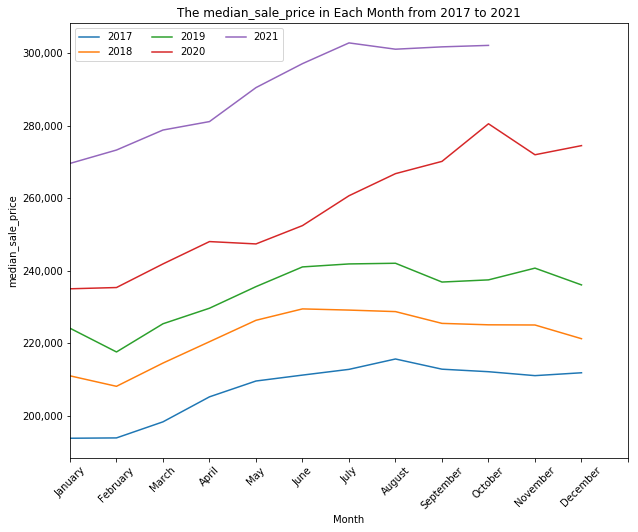

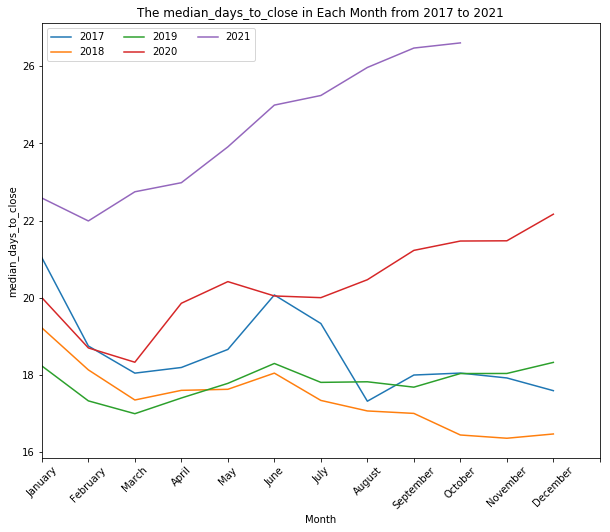

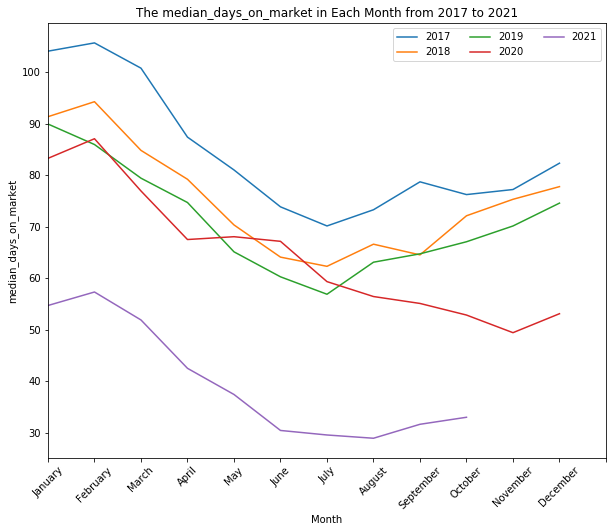

In [17]:
# plot the median trends for the values ['median_sale_price','median_days_to_close','median_days_on_market']
cols_list=['median_sale_price','median_days_to_close','median_days_on_market']
for i in cols_list:
    line_trends(i)


<b>Evaluation: </b><br>
In spite of the outbreak of the pandemic that happened in 2019, we can see that from 2019 to 2020 and then 2020 to 2021, the increasing rate of the median sales price is higher and higher. The year-over-year median home-sale price increased 12% for the month of September for 2021, and this was up to 27% from the same period compared to 2019.The median_days_to_close chart shows a opposite conception regarding how fast the sales are going. When homes are selling higher prices and off market very fast, but it takes longer to actually close the deal which is surprisingly match my own situation. We got the place in a week, but it tooks almost 3 months for the seller to fix all the problems in the disclosure. 

<h3>What is the year over year variation percentage when comparing different years?</h3>
The code below is to caculate the year over year home median sales price comparing years over period of month

In [18]:
#  write a function to calculate the year over year difference between any years and over any month period in the year
def yoy_calculation(year_later, year_earlier, period):
    '''
    INPUT - year_later - string - the year that recorded in a greater number and stored as string 
            year_earlier - string - the year that recorded in a smaller number and stored as string 
            period - string - the string notation of each month
    
    OUTPUT - yoy_later_earlier - float - the calculated year over year percentage 
    '''
    
    calculate_data = df_sub[['period_begin', 'period_end', 'median_sale_price', \
                              'year', 'month_str', 'last_updated']] \
                             .dropna(subset=['median_sale_price'], axis=0)
    yoy_later=calculate_data.query("year=='%s' and month_str=='%s'" % (year_later, period))
    yoy_earlier=calculate_data.query("year=='%s' and month_str=='%s'" % (year_earlier,period))
      
    yoy_later_avg=yoy_later.median_sale_price.mean()
    yoy_earlier_avg=yoy_earlier.median_sale_price.mean()
    
    yoy_later_earlier = (yoy_later_avg-yoy_earlier_avg)/yoy_earlier_avg
    print('The year over year percentage from {} to {} over period on {} is {:.0%}.'.format(year_later,year_earlier,period,yoy_later_earlier))

In [19]:
print(yoy_calculation('2021', '2020', 'September'))

print(yoy_calculation('2021', '2019', 'September'))

The year over year percentage from 2021 to 2020 over period on September is 12%.
None
The year over year percentage from 2021 to 2019 over period on September is 27%.
None


In [20]:
new_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

sale_yoy_data=df_sub[['year', 'month_str', 'median_sale_price_yoy']].dropna(subset=['median_sale_price_yoy'])
sale_yoy=sale_yoy_data.groupby(['year', 'month_str']).mean()['median_sale_price_yoy']
sale_yoy_pivot=sale_yoy.reset_index().pivot(index='month_str', columns='year', values='median_sale_price_yoy')
sale_yoy_plot=sale_yoy_pivot.reindex(new_order, axis=0)
sale_yoy_plot

year,2017,2018,2019,2020,2021
month_str,,,,,
January,0.166145,0.218358,0.233058,0.150967,0.234462
February,0.221173,0.175115,0.124370,0.165255,0.292843
March,0.155147,0.162539,0.134090,0.151856,0.237093
April,0.151444,0.149501,0.114512,0.167306,0.226459
May,0.142982,0.133253,0.131669,0.113240,0.270488
June,0.124565,0.143359,0.104685,0.087922,0.282911
July,0.136445,0.119238,0.120491,0.144615,0.234935
August,0.127750,0.151316,0.131564,0.177192,0.238589
September,0.128228,0.130613,0.111440,0.196920,0.199477


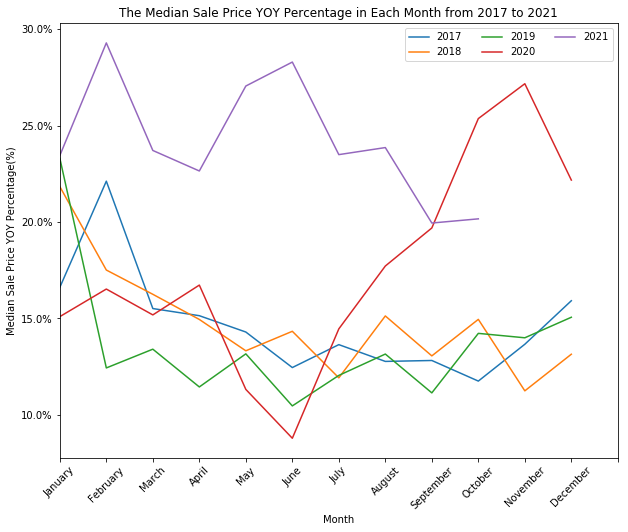

In [21]:
# plot the line chart of general year over year percentage on median sales price
ax2=sale_yoy_plot.plot(figsize=(10,8))
ax2.yaxis.set_major_formatter(mpl.ticker.PercentFormatter(1.0))
ax2.set_ylabel('Median Sale Price YOY Percentage(%)')
ax2.set_xlabel('Month')
ax2.set_title('The Median Sale Price YOY Percentage in Each Month from 2017 to 2021')
handles, labels = ax2.get_legend_handles_labels()
ax2.legend(handles, labels, loc='upper right', ncol=3)
ax2.set_xticks([0,1,2,3,4,5,6,7, 8, 9, 10, 11, 12])
ax2.set_xticklabels(new_order)
plt.xticks(rotation=45)

plt.savefig('median_price_yoy.png', bbox_inches='tight')
plt.show()

<b>Evaluation: </b><br>
This year over year median sale price chart shows some details for the housing market before and after the pandemic. There is a big dip during the summer of 2020 when the covid cases start to surge in the US, but it did not last very long and the market went back or even higher afterward and the year over year rate that calculate from 2021 to compare to 2020 is higher than any other trends. 

<h3>How soon can homes be sold and what are the median days that homes on the market?</h3>

In [22]:
# The percentage of homes that were off market in one/two weeks. 
new_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

off_market_df=df_sub[["year", "month_str", "off_market_in_two_weeks","off_market_in_one_week", "total_homes_sold"]].dropna(subset=["off_market_in_two_weeks","off_market_in_one_week"], axis=0)
off_market=off_market_df.groupby(['year', 'month_str']).sum().reset_index()
off_market['month_str']=pd.Categorical(off_market['month_str'], new_order)
off_market.sort_values(by=['year', 'month_str'])

off_market_sum=off_market.groupby(['year']).sum()
off_market_sum['one_week_in_pct']=off_market_sum['off_market_in_one_week']/off_market_sum['total_homes_sold']
off_market_sum['two_week_in_pct']=off_market_sum['off_market_in_two_weeks']/off_market_sum['total_homes_sold']

off_m_plot=off_market_sum.reset_index()
off_m_plot

,year,off_market_in_two_weeks,off_market_in_one_week,total_homes_sold,one_week_in_pct,two_week_in_pct
0,2017,1604930.0,1039809.0,6702433.0,0.155139,0.239455
1,2018,1639891.0,1070477.0,6699725.0,0.159779,0.244770
2,2019,1590033.0,1051419.0,6736266.0,0.156083,0.236041
3,2020,2154165.0,1543201.0,7052153.0,0.218827,0.305462
4,2021,2677487.0,1966231.0,6421843.0,0.306179,0.416934


<Figure size 576x576 with 0 Axes>

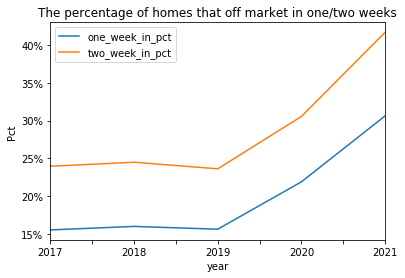

In [23]:
# plot the trend of the table above and visualize the trend of homes off market in one/two weeks
off_weeks = off_m_plot[['year', 'one_week_in_pct',  'two_week_in_pct' ]]
off_weeks.set_index('year', inplace=True)

plt.figure(figsize=(8, 8))
ax=off_weeks.plot()
ax.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:.0%}'))
plt.xlabel('year')
plt.ylabel('Pct')
plt.title('The percentage of homes that off market in one/two weeks')

plt.show()

<b>Evaluation: </b><br>
The percentage of homes that off market in one week and two weeks stay pretty steady with 16% and 24% from 2017 to 2019, but the numbers increased to 22% and 31% and that is 31% and 42% in 2021. The demands are very high and homes are sold faster in 2020 and 2021. 

<h3> What are the top metro areas in terms of median sales price and the total number of homes sold?</h3>

In [33]:
metro_data=df_sub[['region_name','year', 'total_homes_sold']].query("region_name !='All Redfin Metros'")
total_sale = metro_data[['year', 'total_homes_sold']].groupby('year').sum()
# total_sale=metro_sold.groupby(['year'])['total_homes_sold'].sum()
total_sale

,total_homes_sold
year,
2017,3398455.0
2018,3389896.0
2019,3408898.0
2020,3566349.0
2021,3240774.0


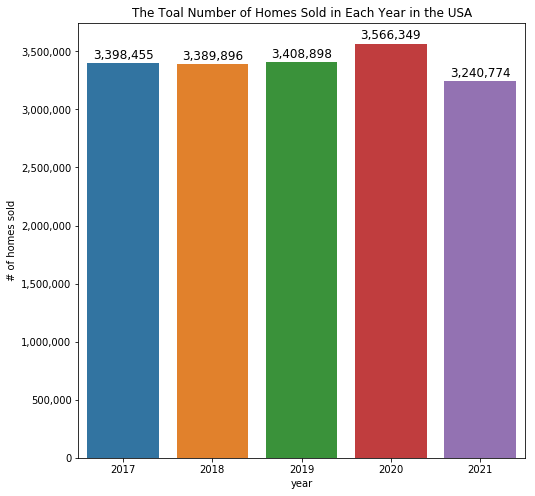

In [34]:
# take a brief look at the total number of home sold each year. The number of each year looks pretty close to me 
# 2020 has the largest number of homes sold comparing to the other years,
# and here 2021 is less than any of the past years for it's around 2 monthes and half short so far

total_sale.reset_index(inplace=True)
plt.figure(figsize=(8, 8))
ax=sns.barplot(x='year', y='total_homes_sold', data=total_sale)
for bar in ax.patches:
   
  # Using Matplotlib's annotate function and
  # passing the coordinates where the annotation shall be done
  # x-coordinate: bar.get_x() + bar.get_width() / 2
  # y-coordinate: bar.get_height()
  # free space to be left to make graph pleasing: (0, 8)
  # ha and va stand for the horizontal and vertical alignment
    ax.annotate(format(bar.get_height(), ',.0f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=12, xytext=(0, 8),
                   textcoords='offset points')
 
ax.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))
ax.set(xlabel='year', ylabel='# of homes sold')
plt.title("The Toal Number of Homes Sold in Each Year in the USA")
plt.savefig('total_sale.png', bbox_inches='tight')
plt.show()

In [35]:
# this function will prepare the data for each year and generate the horizontal bar chart of the top 30 metro areas
# in each year regarding the total number of homes sold. Here since we are summing up the total number which already 
# been groupped by week, we don't have to drop the null values

def barh_top_metros(year_order):
    '''
    INPUT - year_order - string, the year that the data present
              
    OUTPUT - horizontal bar chart showing the top 30 metro areas in the data that had the most number of homes sold in 
             the corresponding year
    '''

    metro_sale_df=pd.DataFrame(df_sub, columns=['year', 'region_name', 'total_homes_sold']) \
            .query("region_name!='All Redfin Metros'")
    metro_group = metro_sale_df.groupby(['year', 'region_name']).sum() \
                               .sort_values(by=['year', 'total_homes_sold'], ascending=False)
    metro_group.reset_index(inplace=True)

    metro_year=metro_group.query("year=='%s'" %(year_order))[['region_name', 'total_homes_sold']].head(n=30)
    metro_year.set_index('region_name', inplace=True)
    metro_year.sort_values(by='total_homes_sold', inplace=True, ascending=True)
        
    index = metro_year.index
    values = metro_year.total_homes_sold
    plot_title = 'Top 30 Metro Areas by Total Home Sold in Year {}'.format(year_order)
    title_size = 18
    x_label = '# of Homes Sold'
    y_label = 'Region Name'

    fig, ax = plt.subplots(1, 1, figsize=(5, 8))
    ax.barh(index, values)
    ax.xaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))
    ax.set_xlabel(x_label)
    ax.set_ylabel(y_label)
    ax.set_title(plot_title)

    plt.savefig('barh_sale.png', bbox_inches='tight')
    plt.show()
    return  

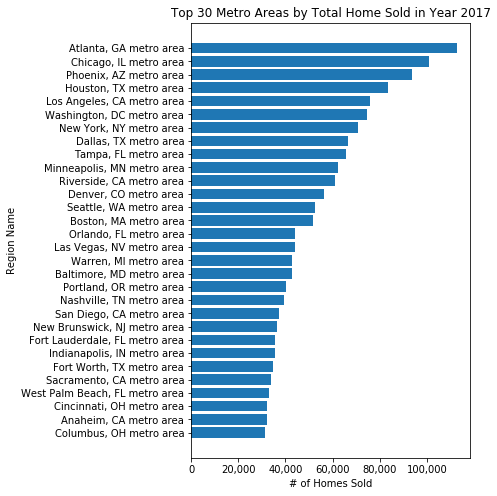

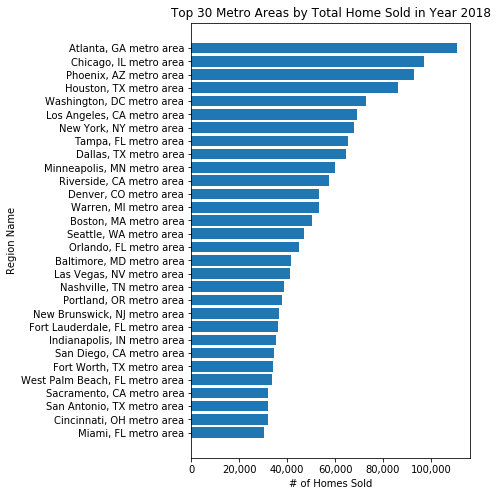

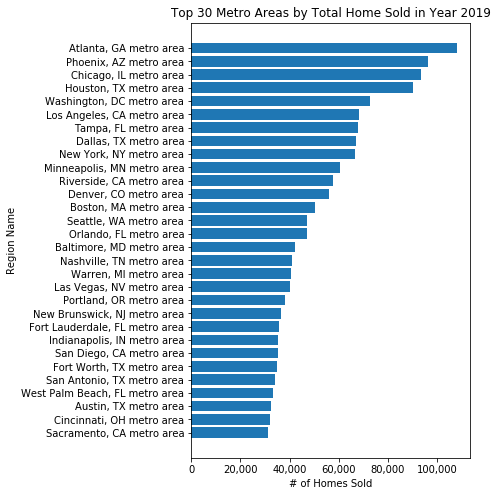

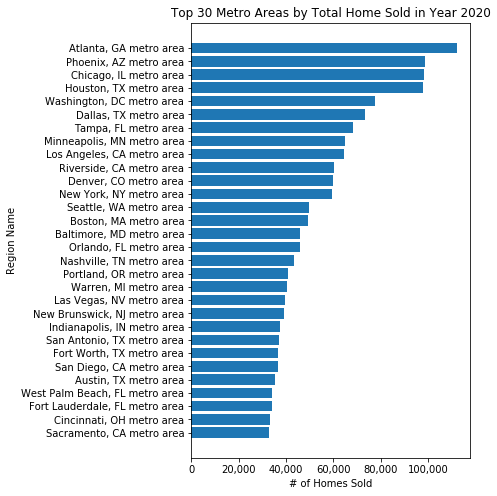

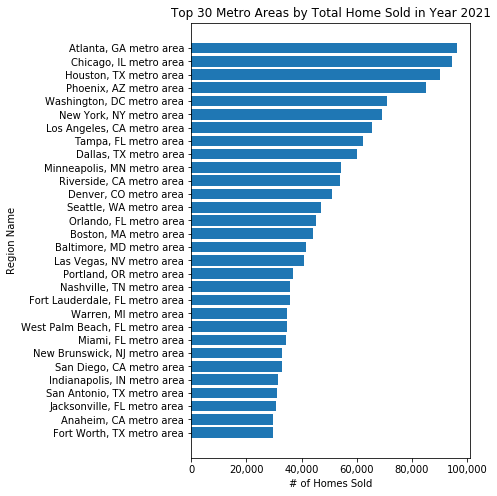

In [36]:
year_list=['2017', '2018', '2019', '2020', '2021']
for year in year_list:
    barh_top_metros(year)

Horizontal bar chart to present the rank of the top 30 metro areas that have the most number of homes sold from 2017-2021, we can find that the list just shuffle slightly from year to year.

In [37]:
## merge the data and find the same metros that appear each year in the top 30 total homes sold list
def count_by_metro(year_order):
    '''
    INPUT - year_order - string, the year that the data present
              
    OUTPUT - metro_year- DataFrame contain the data that had the most number of homes sold in 
             the corresponding year
    '''
    pd.options.display.float_format = '{:,.0f}'.format
    metro_sale_df=pd.DataFrame(df_sub, columns=['year', 'region_name', 'total_homes_sold']) \
            .query("region_name!='All Redfin Metros'")
    metro_group = metro_sale_df.groupby(['year', 'region_name']).sum() \
                               .sort_values(by=['year', 'total_homes_sold'], ascending=False)
    metro_group.reset_index(inplace=True)

    metro_year=metro_group.query("year=='%s'" %(year_order))[['region_name', 'total_homes_sold']].head(n=30)
    metro_year.set_index('region_name', inplace=True)
    metro_year.sort_values(by='total_homes_sold', inplace=True, ascending=True)
    return metro_year

df1_count=count_by_metro('2017')
df1_count.rename(columns={'total_homes_sold':'total_homes_sold_2017'}, inplace=True)
df2_count=count_by_metro('2018')
df2_count.rename(columns={'total_homes_sold':'total_homes_sold_2018'}, inplace=True)
df3_count=count_by_metro('2019')
df3_count.rename(columns={'total_homes_sold':'total_homes_sold_2019'}, inplace=True)
df4_count=count_by_metro('2020')
df4_count.rename(columns={'total_homes_sold':'total_homes_sold_2020'}, inplace=True)
df5_count=count_by_metro('2021')
df5_count.rename(columns={'total_homes_sold':'total_homes_sold_2021'}, inplace=True)

result_count = pd.concat([df1_count, df2_count, df3_count, df4_count, df5_count], axis=1, join="inner").sort_values(by='total_homes_sold_2021', ascending=False)
result_count.reset_index(inplace=True)
result_count

,region_name,total_homes_sold_2017,total_homes_sold_2018,total_homes_sold_2019,total_homes_sold_2020,total_homes_sold_2021
0,"Atlanta, GA metro area","112,747","110,836","108,028","112,212","96,323"
1,"Chicago, IL metro area","100,900","96,982","93,361","98,507","94,552"
2,"Houston, TX metro area","83,311","86,189","90,064","97,936","90,263"
3,"Phoenix, AZ metro area","93,517","92,897","96,308","98,758","84,964"
4,"Washington, DC metro area","74,709","73,089","72,831","77,561","71,085"
5,"New York, NY metro area","70,827","67,716","66,486","59,469","69,071"
6,"Los Angeles, CA metro area","76,008","69,364","68,118","64,571","65,709"
7,"Tampa, FL metro area","65,517","65,207","67,811","68,517","62,208"
8,"Dallas, TX metro area","66,374","64,533","67,042","73,601","60,257"
9,"Minneapolis, MN metro area","62,259","60,143","60,603","64,856","54,242"


In [38]:
result_count.region_name

0             Atlanta, GA metro area
1             Chicago, IL metro area
2             Houston, TX metro area
3             Phoenix, AZ metro area
4          Washington, DC metro area
5            New York, NY metro area
6         Los Angeles, CA metro area
7               Tampa, FL metro area
8              Dallas, TX metro area
9         Minneapolis, MN metro area
10          Riverside, CA metro area
11             Denver, CO metro area
12            Seattle, WA metro area
13            Orlando, FL metro area
14             Boston, MA metro area
15          Baltimore, MD metro area
16          Las Vegas, NV metro area
17           Portland, OR metro area
18          Nashville, TN metro area
19    Fort Lauderdale, FL metro area
20             Warren, MI metro area
21    West Palm Beach, FL metro area
22      New Brunswick, NJ metro area
23          San Diego, CA metro area
24       Indianapolis, IN metro area
25         Fort Worth, TX metro area
Name: region_name, dtype: object

In [39]:
def top_metros_median_price(year_order, plot=True):
    '''
    INPUT - year_order - string, the year that the data present
              
    OUTPUT - horizontal bar chart showing the top 30 metro area in the data that had the highest median home sale price in 
             the corresponding year
    '''

    metro_median_df=pd.DataFrame(df_sub, columns=['year', 'region_name', 'median_sale_price'])\
                      .query("region_name!='All Redfin Metros'").dropna(subset=['median_sale_price'], axis=0)
    metro_median_group = metro_median_df.groupby(['year', 'region_name']).mean()\
                                        .sort_values(by=['year', 'median_sale_price'], ascending=False)
    metro_median_group.reset_index(inplace=True)

    metro_year=metro_median_group.query("year=='%s'" %(year_order))[['region_name', 'median_sale_price']].head(n=30)
    metro_year.set_index('region_name', inplace=True)
    metro_year.sort_values(by='median_sale_price', inplace=True, ascending=True)
        
    index = metro_year.index
    values = metro_year.median_sale_price
    plot_title = 'Top 30 Metro Areas by Median Sale Price in Year {}'.format(year_order)
    title_size = 18
    x_label = 'median sale price($)'
    y_label = 'Region Name'

    fig, ax = plt.subplots(1, 1, figsize=(5, 8))
    ax.barh(index, values)
    ax.xaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))
    ax.set_xlabel(x_label)
    ax.set_ylabel(y_label)
    ax.set_title(plot_title)
    plt.xticks(rotation=45)

    plt.savefig('barh_median_price.png', bbox_inches='tight')
    plt.show()
    return

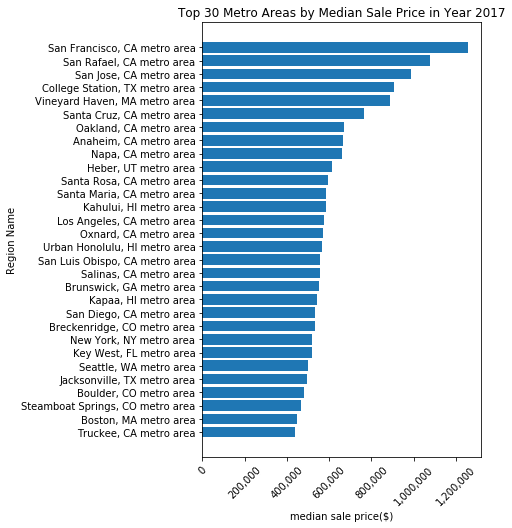

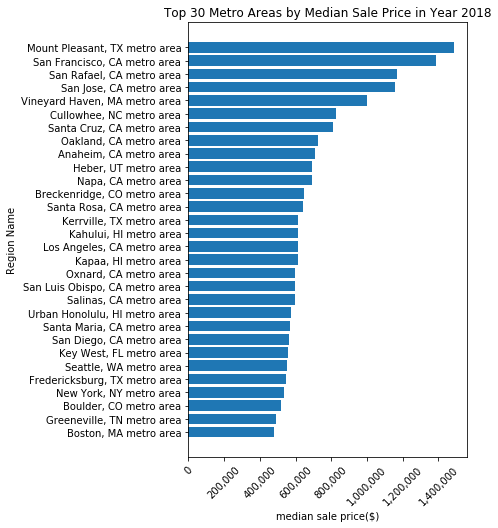

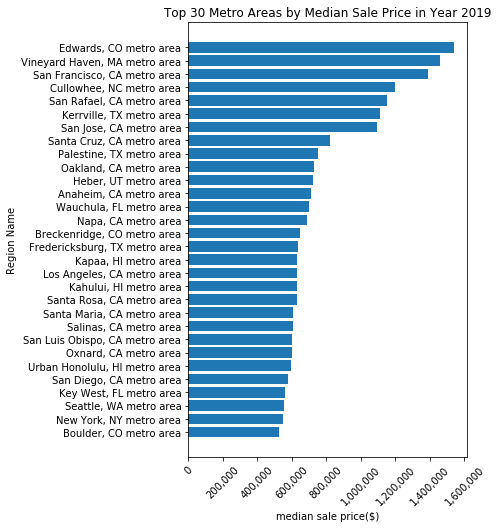

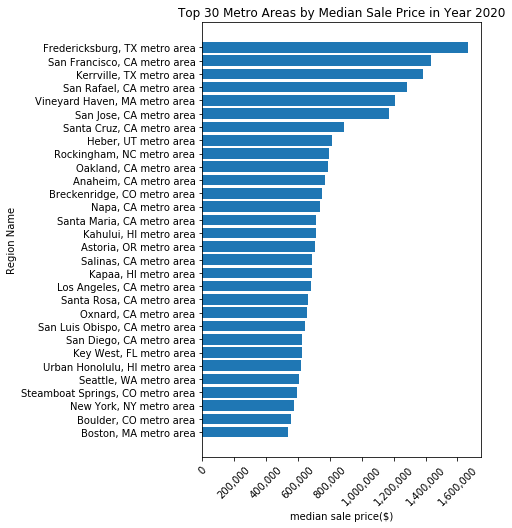

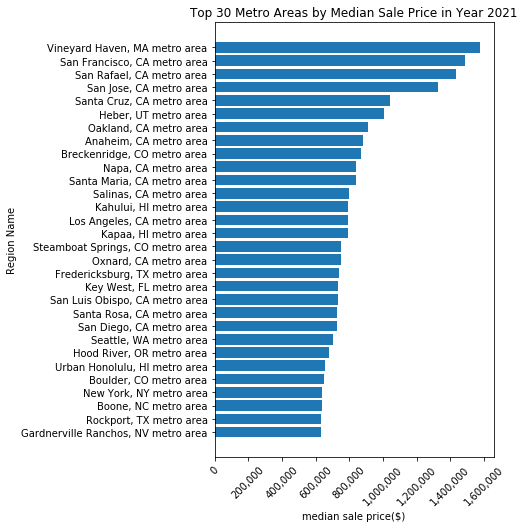

In [40]:
year_list=['2017', '2018', '2019', '2020', '2021']
for year in year_list:
    top_metros_median_price(year)

Horizontal bar chart to present the rank of the top 30 metro areas that have the highest median sales price from 2017-2021, the list also just shuffle slightly from year to year, but the metro areas in the rank are very different to the ones in the most number sold list.

In [41]:
## merge the data and find the same metros that appear in the top 30 highest median_sale_price list each year

def price_by_metro(year_order):
    '''
    INPUT - year_order - string, the year that the data present
              
    OUTPUT - metro_year- DataFrame contain the data that had the highest median home sales price in 
             the corresponding year
    '''
    pd.options.display.float_format = '{:,.0f}'.format
    metro_median_df=pd.DataFrame(df_sub, columns=['year', 'region_name', 'median_sale_price']) \
            .query("region_name!='All Redfin Metros'").dropna(subset=['median_sale_price'], axis=0)
    metro_median_df.dropna(subset=['median_sale_price'], axis=0, inplace=True)
    metro_median_group = metro_median_df.groupby(['year', 'region_name']).mean() \
                               .sort_values(by=['year', 'median_sale_price'], ascending=False)
    metro_median_group.reset_index(inplace=True)

    metro_year=metro_median_group.query("year=='%s'" %(year_order))[['region_name', 'median_sale_price']].head(n=30)
    metro_year.set_index('region_name', inplace=True)
    metro_year.sort_values(by='median_sale_price', inplace=True, ascending=True)
    
    return metro_year

df1=price_by_metro('2017')
df1.rename(columns={'median_sale_price':'median_sale_price_2017'}, inplace=True)
df2=price_by_metro('2018')
df2.rename(columns={'median_sale_price':'median_sale_price_2018'}, inplace=True)
df3=price_by_metro('2019')
df3.rename(columns={'median_sale_price':'median_sale_price_2019'}, inplace=True)
df4=price_by_metro('2020')
df4.rename(columns={'median_sale_price':'median_sale_price_2020'}, inplace=True)
df5=price_by_metro('2021')
df5.rename(columns={'median_sale_price':'median_sale_price_2021'}, inplace=True)

result_median_price = pd.concat([df1, df2, df3, df4, df5], axis=1, join="inner").sort_values(by=['median_sale_price_2021'], ascending=False)
result_median_price.reset_index(inplace=True)
result_median_price


,region_name,median_sale_price_2017,median_sale_price_2018,median_sale_price_2019,median_sale_price_2020,median_sale_price_2021
0,"Vineyard Haven, MA metro area","887,812","1,000,488","1,456,287","1,205,804","1,578,490"
1,"San Francisco, CA metro area","1,257,930","1,388,822","1,387,716","1,436,652","1,488,893"
2,"San Rafael, CA metro area","1,078,946","1,167,186","1,149,856","1,281,962","1,433,718"
3,"San Jose, CA metro area","988,013","1,158,096","1,092,507","1,169,205","1,326,280"
4,"Santa Cruz, CA metro area","765,233","810,173","819,471","885,808","1,044,517"
5,"Heber, UT metro area","610,955","691,482","721,786","810,664","1,003,682"
6,"Oakland, CA metro area","669,734","725,474","728,793","787,585","914,077"
7,"Anaheim, CA metro area","663,919","707,374","712,053","767,817","881,435"
8,"Breckenridge, CO metro area","530,931","646,292","649,392","750,673","869,725"
9,"Napa, CA metro area","659,662","691,170","684,957","737,173","842,464"


In [42]:
result_median_price.region_name

0      Vineyard Haven, MA metro area
1       San Francisco, CA metro area
2          San Rafael, CA metro area
3            San Jose, CA metro area
4          Santa Cruz, CA metro area
5               Heber, UT metro area
6             Oakland, CA metro area
7             Anaheim, CA metro area
8        Breckenridge, CO metro area
9                Napa, CA metro area
10        Santa Maria, CA metro area
11            Salinas, CA metro area
12            Kahului, HI metro area
13        Los Angeles, CA metro area
14              Kapaa, HI metro area
15             Oxnard, CA metro area
16           Key West, FL metro area
17    San Luis Obispo, CA metro area
18         Santa Rosa, CA metro area
19          San Diego, CA metro area
20            Seattle, WA metro area
21     Urban Honolulu, HI metro area
22            Boulder, CO metro area
23           New York, NY metro area
Name: region_name, dtype: object

In [43]:
# merge the two list to find the metros that in both top number sale list and top median price list 
count=result_count.set_index('region_name')
median=result_median_price.set_index('region_name')

count_median_merge=pd.concat([count, median], axis=1, join='inner')
count_median_merge

,total_homes_sold_2017,total_homes_sold_2018,total_homes_sold_2019,total_homes_sold_2020,total_homes_sold_2021,median_sale_price_2017,median_sale_price_2018,median_sale_price_2019,median_sale_price_2020,median_sale_price_2021
region_name,,,,,,,,,,
"New York, NY metro area","70,827","67,716","66,486","59,469","69,071","519,185","538,350","546,770","572,275","641,085"
"Los Angeles, CA metro area","76,008","69,364","68,118","64,571","65,709","573,681","613,750","631,035","682,668","793,375"
"Seattle, WA metro area","52,662","46,876","47,196","49,655","46,916","500,125","551,050","556,063","605,951","704,669"
"San Diego, CA metro area","37,334","34,350","35,229","36,504","32,907","533,474","565,112","578,465","626,173","726,560"


From the above charts and the summary tables, there are 26 metro areas appear in the top 30 list of total number homes sold every year and there are 24 metro areas in the median sales price list. New York from NY, Los Angeles, San Diego from CA, Seattle, WA are in the both list for 5 years. Those metro areas are kind of fixed in the popular lists and this also indicates that the housing market in those metro areas are pretty stable. 